Continous Probability Distribution - Normal Distribution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import norm
from scipy.stats import zscore

ModuleNotFoundError: No module named 'scipy'

In [2]:
df=pd.read_csv("../Datasets/hs_heights_pair.csv")

In [3]:
boys_height=df['boys']
girls_height=df['girls']

In [4]:
mean_boys = boys_height.mean()
std_boys = boys_height.std()

In [5]:
mean_girls = girls_height.mean()
std_girls = girls_height.std()

In [6]:
print(f"Boys: Mean: {mean_boys},Standard Deviation: {std_boys:.4f}")
print(f"Girs: Mean: {mean_girls},Standard Deviation: {std_girls:.4f}")

Boys: Mean: 67.16386,Standard Deviation: 2.8902
Girs: Mean: 61.9776,Standard Deviation: 2.1179


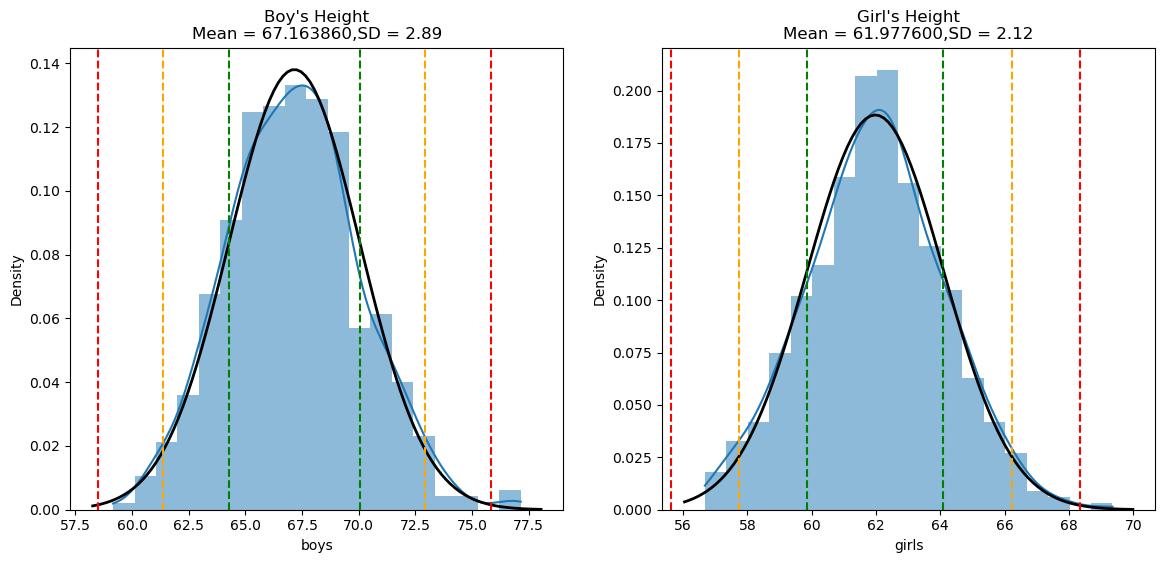

In [7]:
#Define colors for the SD lines
plt.figure(figsize=(14,6))
colors = ['green','orange','red']

#plot for the boys
plt.subplot(1,2,1)
sns.histplot(boys_height,kde=True,stat='density',linewidth=0)
xmin,xmax = plt.xlim()
x = np.linspace(xmin,xmax,100)
p = norm.pdf(x,mean_boys,std_boys)
plt.plot(x,p,'k',linewidth=2)
title = "Boy's Height\nMean = {:2f},SD = {:.2f}".format(mean_boys,std_boys)
plt.title(title)

#plot the standard deviation lines for boys
for i in range(1,4):
    plt.axvline(mean_boys+i*std_boys,color=colors[i-1],linestyle='--')
    plt.axvline(mean_boys-i*std_boys,color=colors[i-1],linestyle='--')



#plot for the Girls
plt.subplot(1,2,2)
sns.histplot(girls_height,kde=True,stat='density',linewidth=0)
xmin,xmax = plt.xlim()
x = np.linspace(xmin,xmax,100)
p = norm.pdf(x,mean_girls,std_girls)
plt.plot(x,p,'k',linewidth=2)
title = "Girl's Height\nMean = {:2f},SD = {:.2f}".format(mean_girls,std_girls)
plt.title(title)


#plot the standard deviation lines for boys
for i in range(1,4):
    plt.axvline(mean_girls+i*std_girls,color=colors[i-1],linestyle='--')
    plt.axvline(mean_girls-i*std_girls,color=colors[i-1],linestyle='--')


Draw A normal distribution plot for the completion time coumn of marathon datasets,separately 
for male and female athlets also show the mean +/- 1,2,3 SD lines

In [8]:
df_2015 = pd.read_csv('../Datasets/marathon_results_2015.csv')
df_2016 = pd.read_csv('../Datasets/marathon_results_2016.csv')
df_2017 = pd.read_csv('../Datasets/marathon_results_2017.csv')

merge_df = pd.concat([df_2015,df_2016,df_2017])
merge_df.head()

Unnamed: 0 Bib                   Name  Age M/F         City State Country  \
0         0.0   3         Desisa, Lelisa   25   M         Ambo   NaN     ETH   
1         1.0   4  Tsegay, Yemane Adhane   30   M  Addis Ababa   NaN     ETH   
2         2.0   8         Chebet, Wilson   29   M     Marakwet   NaN     KEN   
3         3.0  11       Kipyego, Bernard   28   M      Eldoret   NaN     KEN   
4         4.0  10          Korir, Wesley   32   M       Kitale   NaN     KEN   

  Citizen Unnamed: 9  ...      30K      35K      40K     Pace Proj Time  \
0     NaN        NaN  ...  1:32:00  1:47:59  2:02:39  0:04:56         -   
1     NaN        NaN  ...  1:31:59  1:47:59  2:02:42  0:04:58         -   
2     NaN        NaN  ...  1:32:00  1:47:59  2:03:01  0:04:59         -   
3     NaN        NaN  ...  1:32:00  1:48:03  2:03:47  0:05:00         -   
4     NaN        NaN  ...  1:32:00  1:47:59  2:03:27  0:05:00         -   

  Official Time Overall Gender Division Unnamed: 8  
0       2:09:17       1      1        1        NaN  
1       2:09:48       2      2        2        NaN  
2       2:10:22       3      3        3        NaN  
3       2:10:47       4      4        4        NaN  
4       2:10:49       5      5        5        NaN  

[5 rows x 26 columns]

In [9]:
merge_df[['Hours','Minute','Seconds']] = merge_df['Official Time'].str.split(':',expand=True).astype(int)
merge_df['Duratioin_seconds'] = merge_df['Hours'] * 3600 + merge_df['Minute'] * 60 + merge_df['Seconds']  

In [10]:
male_df = merge_df[merge_df['M/F'] == 'M']
female_df = merge_df[merge_df['M/F'] == 'F']

male_time = male_df['Duratioin_seconds']
female_time = female_df['Duratioin_seconds']

In [11]:
male_mean = male_time.mean()
std_male  = male_time.std()

female_mean = female_time.mean()
std_female  = female_time.std()


In [12]:
print(f"Male: Mean: {male_mean:.4f},Standard Deviation: {std_male:.4f}")
print(f"Female: Mean: {female_mean:.4f},Standard Deviation: {std_female:.4f}")

Male: Mean: 13426.9117,Standard Deviation: 2518.2445
Female: Mean: 14667.0264,Standard Deviation: 2283.7220


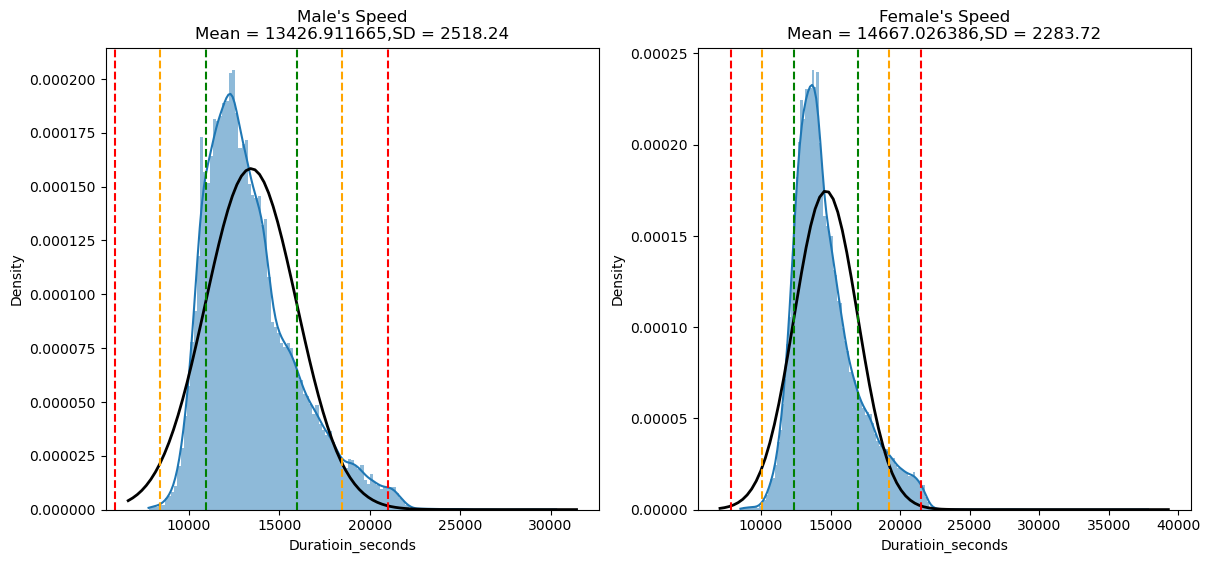

In [13]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
colors = ['green','orange','red']

sns.histplot(male_time,kde=True,stat='density',linewidth=0)
xmin,xmax = plt.xlim()
x = np.linspace(xmin,xmax,100)
p = norm.pdf(x,male_mean,std_male)

plt.plot(x,p,'k',linewidth=2)
title = "Male's Speed\nMean = {:2f},SD = {:.2f}".format(male_mean,std_male)
plt.title(title)
for i in range(1,4):
    plt.axvline(male_mean+i*std_male,color=colors[i-1],linestyle='--')
    plt.axvline(male_mean-i*std_male,color=colors[i-1],linestyle='--')

#plot for the Female
plt.subplot(1,2,2)


sns.histplot(female_time,kde=True,stat='density',linewidth=0)
xmin,xmax = plt.xlim()
x = np.linspace(xmin,xmax,100)
p = norm.pdf(x,female_mean,std_female)

plt.plot(x,p,'k',linewidth=2)
title = "Female's Speed\nMean = {:2f},SD = {:.2f}".format(female_mean,std_female)
plt.title(title)
for i in range(1,4):
    plt.axvline(female_mean+i*std_female,color=colors[i-1],linestyle='--')
    plt.axvline(female_mean-i*std_female,color=colors[i-1],linestyle='--')
#

In [17]:
df = pd.read_csv('../Datasets/2022_forbes_billionaires.csv')
df.head(10)

Unnamed: 0  rank                       name networth  age        country  \
0           0     1                 Elon Musk    $219 B   50  United States   
1           1     2                Jeff Bezos    $171 B   58  United States   
2           2     3  Bernard Arnault & family    $158 B   73         France   
3           3     4                Bill Gates    $129 B   66  United States   
4           4     5            Warren Buffett    $118 B   91  United States   
5           5     6                Larry Page    $111 B   49  United States   
6           6     7               Sergey Brin    $107 B   48  United States   
7           7     8             Larry Ellison    $106 B   77  United States   
8           8     9             Steve Ballmer   $91.4 B   66  United States   
9           9    10             Mukesh Ambani   $90.7 B   64          India   

               source                industry  
0       Tesla, SpaceX             Automotive   
1              Amazon             Technology   
2                LVMH       Fashion & Retail   
3           Microsoft             Technology   
4  Berkshire Hathaway  Finance & Investments   
5              Google             Technology   
6              Google             Technology   
7            software             Technology   
8           Microsoft             Technology   
9         diversified            Diversified

In [18]:
#clean the Networth column
df['networth'] = df['networth'].str.replace('$','',regex=False)
df['networth'] = df['networth'].str.replace('B','',regex=False)
df['networth'] = pd.to_numeric(df['networth'],errors='coerce')


In [19]:
#Drops rows with missing or invalid networth values
df =df.dropna(subset=['networth'])

In [21]:
#calculate z-score for networth
df['networth_zscore'] = zscore(df['networth']).rank(pct=True) * 100
df

Unnamed: 0  rank                       name  networth  age  \
0              0     1                 Elon Musk      219.0   50   
1              1     2                Jeff Bezos      171.0   58   
2              2     3  Bernard Arnault & family      158.0   73   
3              3     4                Bill Gates      129.0   66   
4              4     5            Warren Buffett      118.0   91   
...          ...   ...                        ...       ...  ...   
2595        2595  2578    Jorge Gallardo Ballart        1.0   80   
2596        2596  2578              Nari Genomal        1.0   82   
2597        2597  2578            Ramesh Genomal        1.0   71   
2598        2598  2578            Sunder Genomal        1.0   68   
2599        2599  2578     Horst-Otto Gerberding        1.0   69   

            country                  source                industry  \
0     United States           Tesla, SpaceX             Automotive    
1     United States                  Amazon             Technology    
2            France                    LVMH       Fashion & Retail    
3     United States               Microsoft             Technology    
4     United States      Berkshire Hathaway  Finance & Investments    
...             ...                     ...                     ...   
2595          Spain         pharmaceuticals             Healthcare    
2596    Philippines                 apparel       Fashion & Retail    
2597    Philippines                 apparel       Fashion & Retail    
2598    Philippines                garments       Fashion & Retail    
2599        Germany  flavors and fragrances        Food & Beverage    

      networth_zscore  
0          100.000000  
1           99.961538  
2           99.923077  
3           99.884615  
4           99.846154  
...               ...  
2595         0.461538  
2596         0.461538  
2597         0.461538  
2598         0.461538  
2599         0.461538  

[2600 rows x 9 columns]

In [23]:
#display mean and SD 
networth_mean = df['networth'].mean()
networth_std = df['networth'].std()
print(f"Mean of networth:{networth_mean:.2f} B")
print(f"standard deviation of networth:{networth_std:.2f} B")


Mean of networth:4.86 B
standard deviation of networth:10.66 B


In [24]:
#diplay the first few of the updated dataframe
print("\nFirst few rows of the updated dataframe with z-scores and percentiles: ")
print(df.head())
print(df.tail())


First few rows of the updated dataframe with z-scores and percentiles: 
   Unnamed: 0  rank                       name  networth  age        country  \
0           0     1                 Elon Musk      219.0   50  United States   
1           1     2                Jeff Bezos      171.0   58  United States   
2           2     3  Bernard Arnault & family      158.0   73         France   
3           3     4                Bill Gates      129.0   66  United States   
4           4     5            Warren Buffett      118.0   91  United States   

               source                industry  networth_zscore  
0       Tesla, SpaceX             Automotive        100.000000  
1              Amazon             Technology         99.961538  
2                LVMH       Fashion & Retail         99.923077  
3           Microsoft             Technology         99.884615  
4  Berkshire Hathaway  Finance & Investments         99.846154  
      Unnamed: 0  rank                     name  networt

In [25]:
#save the modified dataframe to csv file
df.to_csv('z-score-and-percentile-2022_forbes_billionaires.csv',index=False)

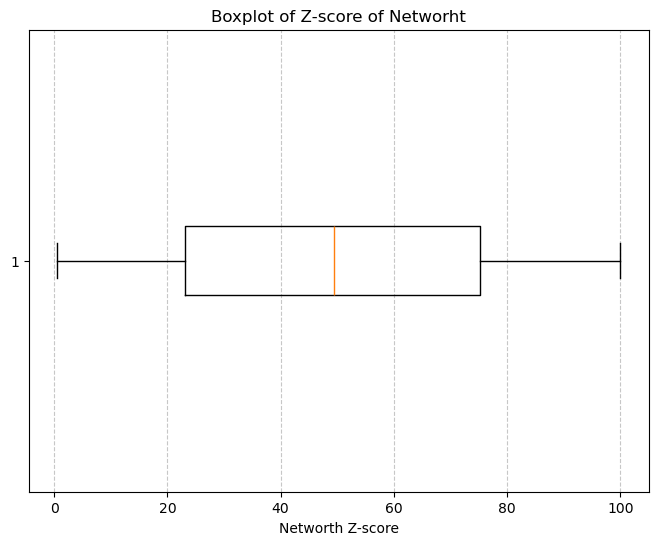

In [26]:
plt.figure(figsize=(8,6))
plt.boxplot(df['networth_zscore'],vert=False)
plt.title('Boxplot of Z-score of Networht')
plt.xlabel('Networth Z-score')
plt.grid(axis='x',linestyle='--',alpha=0.7)
plt.show()

#Assignmment: use https://www.kaggle.com/datasets.bhadramohit/tata-ipl-auction-2025
Find Z-scores and percentile for combined data using the Winning Bid column show top 10 player names and their winning bids
z-score and percentiles. draw a box plot of winning bid z-scores column

In [35]:
df_csk = pd.read_csv('../Datasets/ipl_auction/CSK_Players_List.csv')
df_rcb = pd.read_csv('../Datasets/ipl_auction/RCB_Players_List.csv')
df_kkr = pd.read_csv('../Datasets/ipl_auction/KKR_Players_List.csv')
df_pbks = pd.read_csv('../Datasets/ipl_auction/PBKS_Players_List.csv')
df_lsg = pd.read_csv('../Datasets/ipl_auction/LSG_Players_List.csv')
df_dc = pd.read_csv('../Datasets/ipl_auction/DC_Players_List.csv')
df_rr = pd.read_csv('../Datasets/ipl_auction/RR_Players_List.csv')
df_gt = pd.read_csv('../Datasets/ipl_auction/GT_Players_List.csv')
df_srh = pd.read_csv('../Datasets/ipl_auction/SRH_Players_List.csv')
df_mi = pd.read_csv('../Datasets/ipl_auction/MI_Players_List.csv')

ipl_data = pd.concat([df_csk,df_dc,df_rcb,df_kkr,df_pbks,df_lsg,df_rr,df_gt,df_srh,df_mi])
ipl_data.head()

Sr. No.                Player  Base Price  Winning Bid Capped/Uncapped
0        1            Noor Ahmad    20000000    100000000          Capped
1        2  Ravichandaran Ashwin    20000000     97500000          Capped
2        3          Devon Conway    20000000     62500000          Capped
3        4    Syed Khaleel Ahmed    20000000     48000000          Capped
4        5       Rachin Ravindra    15000000     40000000          Capped

In [32]:
ipl_data.columns

Index(['Sr. No.', 'Player', 'Base Price', 'Winning Bid', 'Capped/Uncapped'], dtype='object')

In [41]:
ipl_data['Winning Bid']
ipl_data.sort_values('Winning Bid',ascending=False).head(10).reset_index(drop=True)

Sr. No.             Player  Base Price  Winning Bid Capped/Uncapped
0        1    Josh Hazlewood    200000000   1250000000          Capped
1        1       Jofra Archer   200000000   1250000000          Capped
2        2         Phil Salt    200000000   1150000000          Capped
3        1       Ishan Kishan   200000000   1125000000          Capped
4        3      Jitesh Sharma   100000000   1100000000          Capped
5        4  Bhuvneshwar Kumar   200000000   1075000000          Capped
6        2     Mohammad Shami   200000000   1000000000          Capped
7        5  Liam Livingstone    200000000    875000000          Capped
8        3      Harshal Patel   200000000    800000000          Capped
9        2   Tushar Deshpande   100000000    650000000          Capped

In [46]:
ipl_data = ipl_data.dropna(subset=['Winning Bid'])

mean = ipl_data['Winning Bid'].mean()
mean
std = ipl_data['Winning Bid'].std()
std

246341844.31808633

In [50]:

ipl_data['Z-score-Winning-Bid'] = zscore(ipl_data['Winning Bid'])
ipl_data['percentile'] = zscore(ipl_data['Winning Bid']).rank(pct=True) * 100
ipl_data

Sr. No.                          Player  Base Price  Winning Bid  \
0         1                      Noor Ahmad    20000000    100000000   
1         2            Ravichandaran Ashwin    20000000     97500000   
2         3                    Devon Conway    20000000     62500000   
3         4              Syed Khaleel Ahmed    20000000     48000000   
4         5                 Rachin Ravindra    15000000     40000000   
..      ...                             ...         ...          ...   
13       14               Bevan John Jacobs     3000000      3000000   
14       15  Venkata Satyanarayana Penmetsa     3000000      3000000   
15       16                  Raj Angad Bawa     3000000      3000000   
16       17               Shrijith Krishnan     3000000      3000000   
17       18                   Ashwani Kumar     3000000      3000000   

   Capped/Uncapped  Z-score-Winning-Bid  percentile  
0           Capped            -0.073562   75.549451  
1           Capped            -0.083738   73.901099  
2           Capped            -0.226209   67.307692  
3           Capped            -0.285233   64.560440  
4           Capped            -0.317797   61.813187  
..             ...                  ...         ...  
13        Uncapped            -0.468410   10.164835  
14        Uncapped            -0.468410   10.164835  
15        Uncapped            -0.468410   10.164835  
16        Uncapped            -0.468410   10.164835  
17        Uncapped            -0.468410   10.164835  

[182 rows x 7 columns]

In [51]:
top_10 = ipl_data[['Player','Winning Bid','Z-score-Winning-Bid','percentile']].sort_values('Winning Bid',ascending=False).head(10).reset_index(drop=True)

In [52]:
top_10

Player  Winning Bid  Z-score-Winning-Bid  percentile
0    Josh Hazlewood    1250000000             4.607626   99.725275
1       Jofra Archer   1250000000             4.607626   99.725275
2         Phil Salt    1150000000             4.200566   98.901099
3       Ishan Kishan   1125000000             4.098801   98.351648
4      Jitesh Sharma   1100000000             3.997037   97.802198
5  Bhuvneshwar Kumar   1075000000             3.895272   97.252747
6     Mohammad Shami   1000000000             3.589977   96.703297
7  Liam Livingstone     875000000             3.081152   96.153846
8      Harshal Patel    800000000             2.775857   95.604396
9   Tushar Deshpande    650000000             2.165267   95.054945

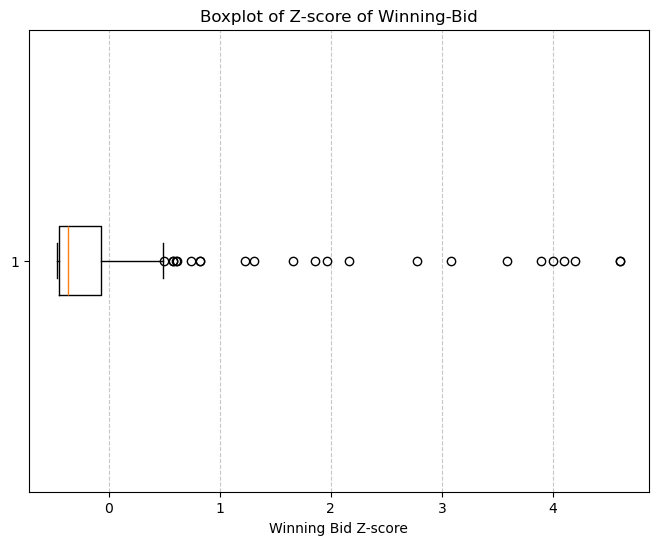

In [53]:
plt.figure(figsize=(8,6))
plt.boxplot(ipl_data['Z-score-Winning-Bid'],vert=False)
plt.title('Boxplot of Z-score of Winning-Bid')
plt.xlabel('Winning Bid Z-score')
plt.grid(axis='x',linestyle='--',alpha=0.7)
plt.show()